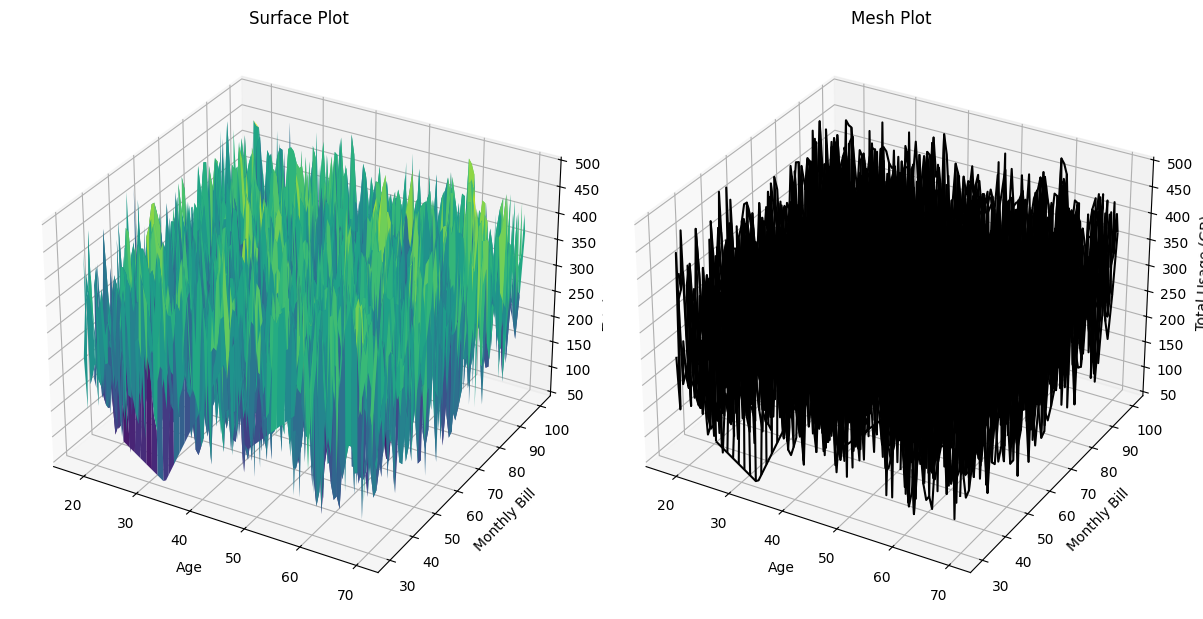

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Load your dataset
df = pd.read_excel(r"C:\Users\SUDEEP MADAGONDA\OneDrive\Desktop\Customer Churn Prediction\customer_churn_large_dataset.xlsx")

# Select features for plotting
X = df['Age']
Y = df['Monthly_Bill']
Z = df['Total_Usage_GB']

# Create a meshgrid for the surface plot
X_grid, Y_grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z_grid = griddata((X, Y), Z, (X_grid, Y_grid), method='linear')

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='none')
ax1.set_title('Surface Plot')
ax1.set_xlabel('Age')
ax1.set_ylabel('Monthly Bill')
ax1.set_zlabel('Total Usage (GB)')

# Mesh plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(X_grid, Y_grid, Z_grid, color='black')
ax2.set_title('Mesh Plot')
ax2.set_xlabel('Age')
ax2.set_ylabel('Monthly Bill')
ax2.set_zlabel('Total Usage (GB)')

plt.tight_layout()
plt.show()

In [3]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

NameError: name 'LogisticRegression' is not defined

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
print(data.columns)

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object


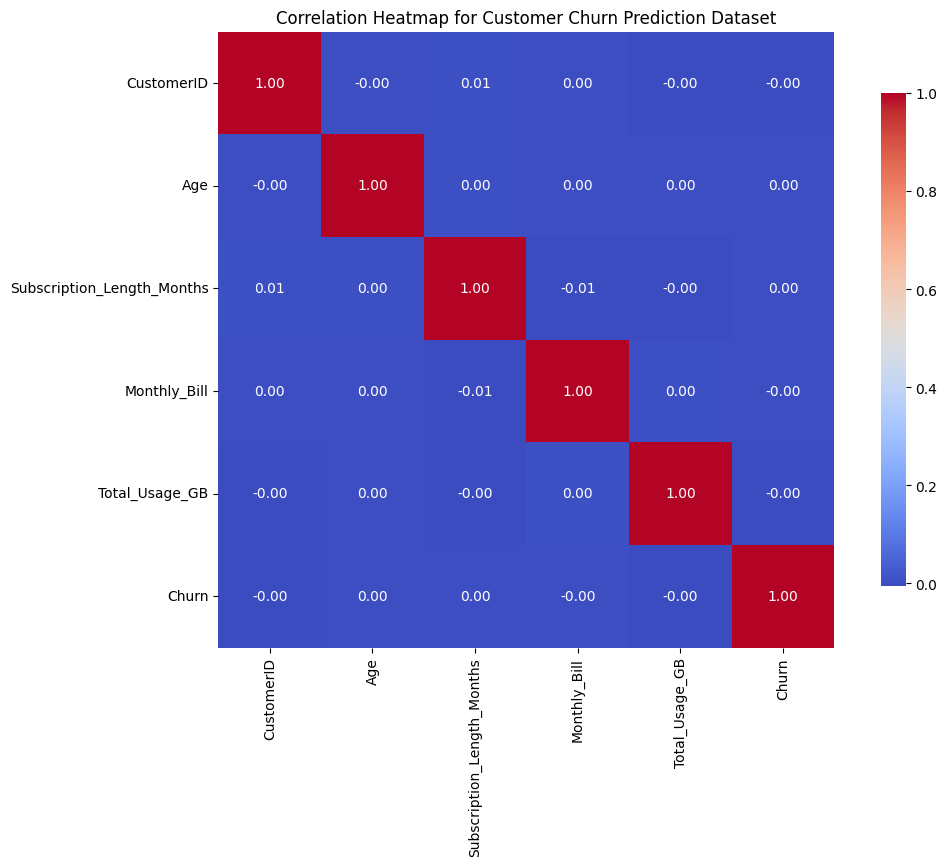

In [13]:
# Load your dataset
data = pd.read_excel("C:\\Users\\SUDEEP MADAGONDA\\OneDrive\\Desktop\\Customer Churn Prediction\\customer_churn_large_dataset.xlsx")

# Check data types
print(data.dtypes)

# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Heatmap for Customer Churn Prediction Dataset')

# Show the plot
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Assuming 'Gender' and 'Location' are categorical columns
categorical_features = ['Gender', 'Location']
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # Encode categorical features
    ]
)

# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Optional: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

# Define your algorithms
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42)
]

# Initialize results dictionary
results = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Train and evaluate models
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    start_time = time.time()
    
    # Train the model
    algorithm.fit(X_train_pca, y_train)
    
    # Predict on the test set
    y_test_pred = algorithm.predict(X_test_pca)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    building_time = time.time() - start_time
    
    # Store results
    results['Algorithm'].append(algorithm_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['Building Time (s)'].append(building_time)

# Create a DataFrame for the results
results_df = pd.DataFrame(results)
results_df

Algorithm  Accuracy  Precision   Recall  F1-score  \
0      LogisticRegression   0.50495   0.504326  0.50495  0.499219   
1  DecisionTreeClassifier   0.49575   0.495747  0.49575  0.495749   
2  RandomForestClassifier   0.49460   0.494452  0.49460  0.494371   

   Building Time (s)  
0           4.685557  
1           6.904792  
2          70.082650

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats

# Initialize dictionary to store results
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    
    # Predict on test data
    y_test_pred = algorithm.predict(X_test_pca)
    
    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Store results
    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)

# Display the results
print(df_test)


                Algorithm  Accuracy  Precision   Recall  F1-score
0      LogisticRegression   0.50495   0.504326  0.50495  0.499219
1  DecisionTreeClassifier   0.49575   0.495747  0.49575  0.495749
2  RandomForestClassifier   0.49460   0.494452  0.49460  0.494371


In [ ]:
Final Model: XGBoost Using 9 variables

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (Make sure the file path is correct)
df_cleaned = pd.read_excel(r"C:\Users\SUDEEP MADAGONDA\OneDrive\Desktop\Customer Churn Prediction\customer_churn_large_dataset.xlsx")

# Verify the dataset is loaded correctly
print(df_cleaned.head())  # Display the first few rows

# Ensure 'Churn' column exists
assert "Churn" in df_cleaned.columns, "Column 'Churn' is missing in df_cleaned"

# Define features (X) and target (y)
X = df_cleaned.drop("Churn", axis=1)
y = df_cleaned["Churn"]

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the split datasets
print(X_train.shape, X_test.shape)  # Expected output: ((70000, 9), (30000, 9))


   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  
(70000, 8) (30000, 8)


In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBClassifier

# Load the dataset (ensure 'df_cleaned' is already cleaned and preprocessed)
# df_cleaned = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a file

# Check and print data types
print(df_cleaned.dtypes)

# Encode categorical features
categorical_columns = ['Name', 'Gender', 'Location']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed

# Define features (X) and target (y)
X = df_cleaned.drop("Churn", axis=1)
y = df_cleaned['Churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns that need scaling
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Initialize and train XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

xgb_classifier.fit(X_train, y_train)

# Print the trained model
print(xgb_classifier)


CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              m

In [30]:
pip install plotly

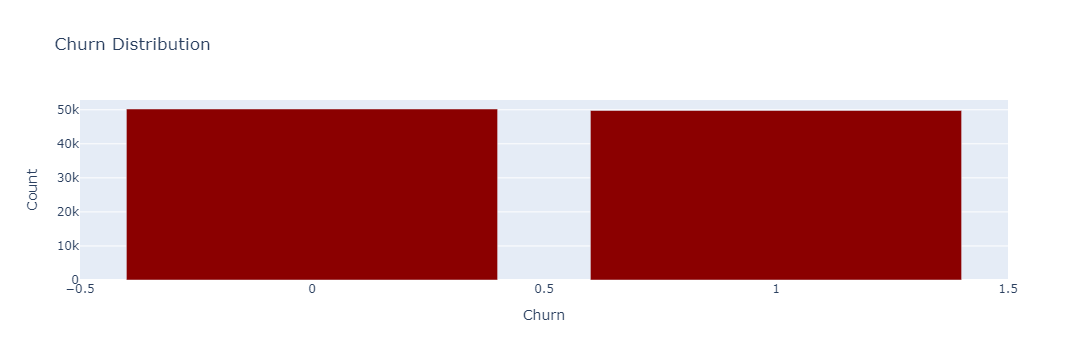

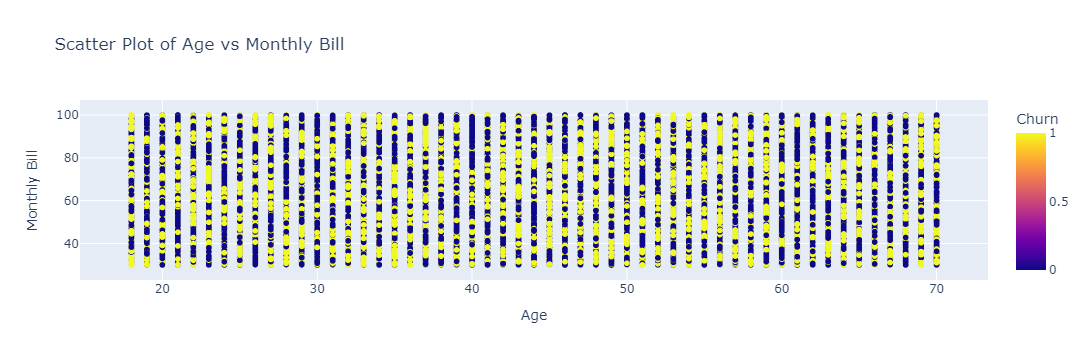

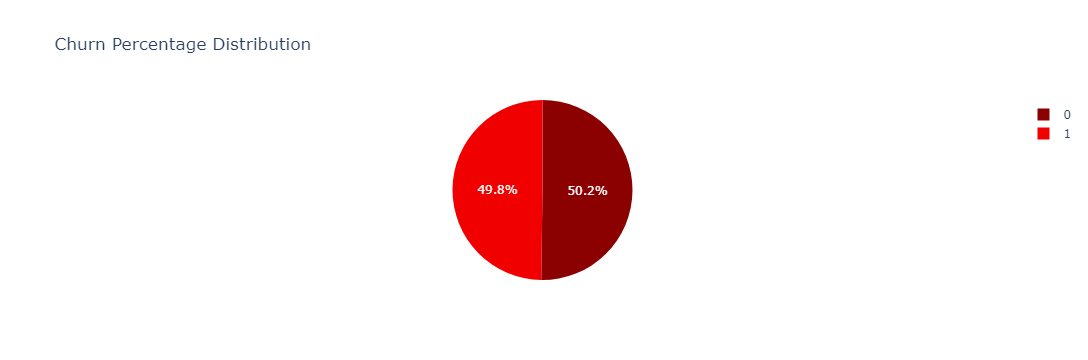

In [34]:
import pandas as pd
import plotly.express as px

# Load your dataset
data = pd.read_excel("C:\\Users\\SUDEEP MADAGONDA\\OneDrive\\Desktop\\Customer Churn Prediction\\customer_churn_large_dataset.xlsx")

# Example 1: Interactive Bar Chart for Churn Distribution
churn_counts = data['Churn'].value_counts()  # Replace 'Churn' with your actual target column name
fig_bar = px.bar(churn_counts, x=churn_counts.index, y=churn_counts.values, 
                  labels={'x': 'Churn Status', 'y': 'Count'},
                  title='Churn Distribution',
                  color_discrete_sequence=['darkred'])  # Set color to dark red
fig_bar.show()

# Example 2: Interactive Scatter Plot
# Replace 'Age' and 'Monthly_Bill' with actual feature names from your dataset
fig_scatter = px.scatter(data, x='Age', y='Monthly_Bill', color='Churn',  # Replace 'Churn' with your actual target column name
                         title='Scatter Plot of Age vs Monthly Bill',
                         labels={'Age': 'Age', 'Monthly_Bill': 'Monthly Bill'},
                         color_discrete_sequence=['darkred'])  # Set color to dark red
fig_scatter.show()

# Example 3: Interactive Pie Chart for Churn Percentage
fig_pie = px.pie(churn_counts, values=churn_counts.values, names=churn_counts.index,
                 title='Churn Percentage Distribution',
                 color_discrete_sequence=['darkred'])  # Set color to dark red
fig_pie.show()

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

# Print the results DataFrame
print(results)


      Metric     Train      Test
0   Accuracy  0.685971  0.490667
1  Precision  0.687955  0.485300
2     Recall  0.678423  0.480267
3   F1-Score  0.683156  0.482770


In [ ]:
Hyperparameter Tunning

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print GridSearchCV object to match expected output format
print(grid_search)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [36]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

# Print the best parameters and recall score
print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best Model: 0.4813442887931034


In [ ]:
Cross Validation

In [37]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.5065     0.49921429 0.49507143 0.49714286 0.503     ]

Mean Accuracy Score: 0.5001857142857143


In [38]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.50350651 0.4967077  0.47838534 0.49069568 0.50586888]

Mean Recall Score: 0.4950328226020013


In [ ]:
Finding Optimal Threshold

In [39]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

Probability  Actual_Label  Predicted_Label
42213     0.465469             0                0
95281     0.569862             1                1
83807     0.444321             1                0
68199     0.593272             1                1
30478     0.555227             1                1
48770     0.500694             1                1
1557      0.772971             1                1
94617     0.587125             1                1
30342     0.549857             0                1
66569     0.446462             0                0

In [40]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

Probability  Accuracy  Precision    Recall  F1 Score
0          0.1  0.499400   0.499207  1.000000  0.665961
1          0.2  0.503500   0.501263  0.999943  0.667776
2          0.3  0.523457   0.511529  0.998998  0.676607
3          0.4  0.592971   0.552356  0.972374  0.704513
4          0.5  0.685971   0.687955  0.678423  0.683156
5          0.6  0.594657   0.896577  0.212190  0.343164
6          0.7  0.525114   0.987868  0.048954  0.093285
7          0.8  0.505186   1.000000  0.008417  0.016693
8          0.9  0.501243   1.000000  0.000515  0.001030
9          1.0  0.500986   1.000000  0.000000  0.000000

In [ ]:
Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)

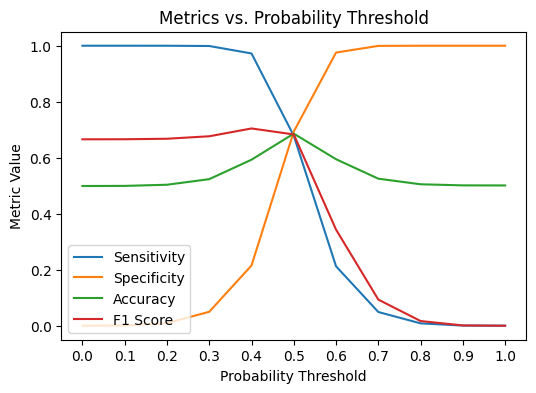

In [41]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

In [ ]:
Model Evaulation (XG Boost)

In [ ]:
Train & Test Data Metrics

In [42]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

Dataset  Accuracy  Precision    Recall  F1-score
0   Train  0.685971   0.686002  0.685957  0.685947
1    Test  0.490667   0.490559  0.490562  0.490548

In [ ]:
Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

Training Set   Test Set
True Positive (%)      34.742857  25.296667
True Negative (%)      15.355714  25.210000
False Positive (%)     16.047143  25.723333
False Negative (%)     33.854286  23.770000

In [ ]:
ROC-AUC Curve

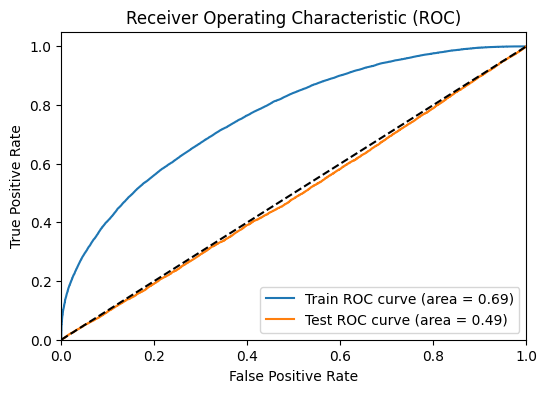

In [44]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
Important Features in Model Building

In [46]:
# Get feature importance from the trained XGBoost model
import pandas as pd

# Get the feature importances
feature_importances = best_xgb.feature_importances_

# Get the feature names (assuming you used the original column names)
feature_names = X_train.columns

# Create a DataFrame to display feature names with their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)


                      Feature  Importance
4                    Location    0.132513
0                  CustomerID    0.131684
2                         Age    0.129015
1                        Name    0.126463
6                Monthly_Bill    0.123661
5  Subscription_Length_Months    0.122677
7              Total_Usage_GB    0.121963
3                      Gender    0.112024


In [ ]:
Save model in a pickle file

In [47]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

In [ ]:
Outcome

In [48]:
print("The outcome of this customer churn prediction project involves developing a machine learning model to predict whether customers are likely to churn or not. This prediction is based on various customer attributes such as age, gender, location, subscription length, monthly bill, and total usage. The model's primary purpose is to assist in identifying customers who are at a higher risk of churning, enabling the business to take proactive measures to retain them. By using the trained model to predict churn, the company can allocate resources more effectively, personalize engagement strategies, and implement targeted retention efforts. Ultimately, the project's success is measured by the model's ability to make predictions, helping the company reduce churn rates, improve customer satisfaction, and optimize its customer retention strategies.")


The outcome of this customer churn prediction project involves developing a machine learning model to predict whether customers are likely to churn or not. This prediction is based on various customer attributes such as age, gender, location, subscription length, monthly bill, and total usage. The model's primary purpose is to assist in identifying customers who are at a higher risk of churning, enabling the business to take proactive measures to retain them. By using the trained model to predict churn, the company can allocate resources more effectively, personalize engagement strategies, and implement targeted retention efforts. Ultimately, the project's success is measured by the model's ability to make predictions, helping the company reduce churn rates, improve customer satisfaction, and optimize its customer retention strategies.
